In [341]:
import numpy as np
import pandas as pd

In [342]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


--2022-09-19 21:07:01--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.9’

housing.csv.9       100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2022-09-19 21:07:01 (43.3 MB/s) - ‘housing.csv.9’ saved [1423529/1423529]



In [343]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [344]:
# use only the 1st 10 columns
del df[df.columns[-1]]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [345]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

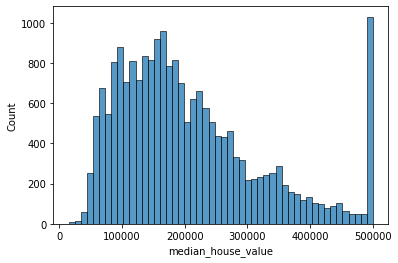

In [346]:
sns.histplot(df.median_house_value, bins=50)

**Question 1
Find a feature with missing values. How many missing values does it have?**

In [347]:
col_na = dict(df.isnull().sum())
col_with_na = [col for col in col_na.keys() if col_na[col]>0]
col_with_na 

['total_bedrooms']

In [348]:
df['population'].quantile(q=0.5)


1166.0

****

In [349]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
print(f"n_train: {n_train}, n_val: {n_val}, n_test: {n_test}")


n_train: 12384, n_val: 4128, n_test: 4128


In [350]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[20046  3024 15663 ...  5390   860 15795]


In [351]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [352]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [353]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [354]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



In [355]:
# # filling missing values with zero
X_train1 = df_train.fillna(0)
X_train1.isnull().sum()
#df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg1 = LinearRegression().fit(X_train1, y_train)
y_val_pred1 = reg1.predict(df_val)
print(round(mean_squared_error(y_val, y_val_pred1),2))

0.11


In [357]:
# print(col_with_na)
X_train2 = df_train.fillna(df.mean())
X_train2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [358]:
reg2 = LinearRegression().fit(X_train2, y_train)
y_val_pred2 = reg2.predict(df_val)
print(round(mean_squared_error(y_val, y_val_pred2),2))

0.11


In [359]:
# from sklearn.linear_model import Ridge
# r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
# min_rmse = 1
# min_rmse_r = 0 
# for r in r_values:
#   ridge = Ridge(alpha=r).fit(X_train1, y_train)
#   y_val_pred = ridge.predict(df_val)
#   rmse = mean_squared_error(y_val, y_val_pred)
#   #print(f'{rmse} , {r}')
#   if rmse < min_rmse:
#     min_rmse = rmse
#     print(rmse)
#     print(r)
#     min_rmse_r = r



In [360]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [361]:
min_rmse = 1
min_rmse_r = 0
for r in [0.0, 0.00001, 0.0001, 0.01, 0.1, 1, 10]:
    
    # training
   
    w0, w = train_linear_regression_reg(X_train1, y_train, r=r)

    # prediction
    print(w.shape)
    y_pred = w0 + df_val.dot(w)

    # validation
    rmse = mean_squared_error(y_val, y_pred)
    print(f"r: {r}, w0: {w0}, score: {rmse}")
    if rmse < min_rmse:
      min_rmse = rmse
      min_rmse_r =r
min_rmse_r

(8,)
r: 0.0, w0: -11.686975242036546, score: 0.10859202215997805
(8,)
r: 1e-05, w0: -11.68681458438968, score: 0.10859201980185319
(8,)
r: 0.0001, w0: -11.685368865034667, score: 0.10859199872882899
(8,)
r: 0.01, w0: -11.528493585632091, score: 0.10859129723898484
(8,)
r: 0.1, w0: -10.274500282195673, score: 0.108698608751763
(8,)
r: 1, w0: -4.920480897742212, score: 0.11141491093480284
(8,)
r: 10, w0: -0.7899311831779245, score: 0.11601270662869945


0.01

In [362]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[ 9337 20253 12117 ... 12725 18498  9615]


In [392]:
rmse = []
for s in seeds:
  np.random.seed(s)
  np.random.shuffle(idx) 

  df_train = df.iloc[idx[:n_train]]
  X_train=df_train.fillna(0)
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)


  del X_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  #w0, w = train_linear_regression_reg(X_train, y_train, r=0)
  reg = LinearRegression().fit(X_train, y_train)

  y_pred = reg.predict(df_val)
    # prediction
  #y_pred = #w0 + df_val.dot(w)

  # validation
  rmse.append(mean_squared_error(y_val, y_pred))

ValueError: ignored